In [1]:
# Import the necessary lib.
# Load the data into DF
# Identify the X (feature) and Y (outcome/response) variables in the DF 
# Splitting the data into training and validation data
# Model fitting
# Model Diagnostics ###
# Model Performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HomeProducts_raw_data.csv')

In [4]:
df.head()

,S.I,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0


In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
x = sm.add_constant(df.Advertisement.values)
y = df.Sales.values

In [ ]:
# training data > model learning (fit)
# testing data > model evaluation/perf.metrics

# Source: X and y data

# training data > X and y > train_X and train_y [ model will learn from this..]
# train_X, train_y are subsets of X and y respectively.

# testing data > X and y > test_X and test_y [model will predict using test_X and perf. evaluation
# will happen against test_y]

# random_state is just a seed value for repeatability of results.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=101)

In [8]:
# model learns from training data alone
# OLS method takes in training y and training X data as parameters

In [9]:
model = sm.OLS(y_train, x_train).fit()

In [10]:
# params gives you B0 and B1
model.params

array([26.21637012,  3.64022056])

In [11]:
# summary gives a list of statistical information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     8.925
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00491
Time:                        20:46:37   Log-Likelihood:                -228.52
No. Observations:                  40   AIC:                             461.0
Df Residuals:                      38   BIC:                             464.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2164     79.018      0.332      0.742    -133.747     186.180
x1             3.6402      1.219      2.987      0.005       1.173       6.107
==============================================================================
Omnibus:                        2.389   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.681
Skew:                           0.296   Prob(JB):                        0.432
Kurtosis:                       2.189   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Making prediction using x_test data

y_pred = model.predict(x_test) 
y_pred

array([215.50783911, 273.75136802, 208.22739799, 226.42850078,
       277.39158858, 304.07440527, 208.22739799, 273.75136802,
       297.04877959, 277.39158858])

### Import Performance metrics - R squared and MSE

In [13]:
# Evaluate the model using performance metrics from sklearn

from sklearn.metrics import r2_score,mean_squared_error

In [14]:
r2_score(y_test,y_pred)

-0.3168890782271627

In [15]:
#MSE

In [16]:
mse = mean_squared_error(y_test,y_pred)
mse

3019.415954122368

In [17]:
#RMSE

In [18]:
rmse = np.sqrt(mse)
rmse

54.9492124977453

### Predicting a single Outcome

In [19]:
x_new = [1,60]
pred_y_new = model.predict(x_new)

In [20]:
pred_y_new

array([244.62960356])

### Prediction Intervals

In [21]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [22]:
_, y_pred_low, y_pred_high = wls_prediction_std(model, x_new, alpha=0.05)

In [23]:
y_pred_low, y_pred_high

(array([90.25770469]), array([399.00150244]))

### Normal P-P Plot

In [24]:
sales_residuals = model.resid
sales_residuals

array([ -61.79379415,  -84.58717743,  -38.75136802,  -55.82026982,
        -50.03180914,    5.37039644,   97.89733776,  -49.23291193,
         77.89419647, -135.55026524,  -47.41280165,   42.21171978,
         66.22741891,  -15.50783911,   12.65083755,   52.45821999,
        -11.37461813,   19.8464264 ,  -96.15136802,  -48.31225025,
        -77.59269137,   56.48138437,  109.93127867,   97.37336773,
        -16.98938301, -120.11114747,  161.52907309,   73.57149922,
         18.08995532,  122.65083755,  -68.26982412,   90.12686752,
        121.64532362,   -0.98938301,  -26.47092691,  -95.50783911,
        -21.03180914,    4.79254375,  -64.62960356,  -44.62960356])

<Figure size 800x1600 with 0 Axes>

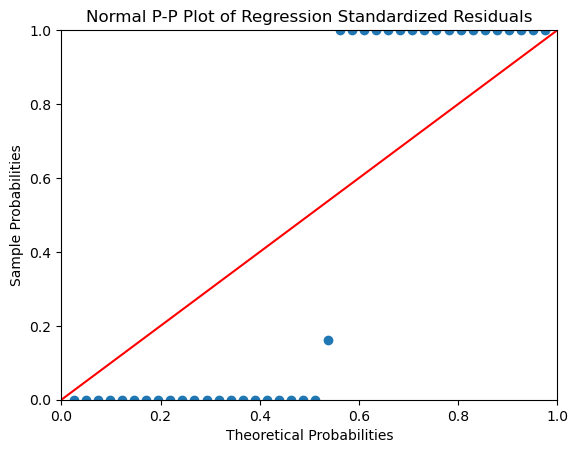

In [26]:
probplot = sm.ProbPlot(sales_residuals)
plt.figure(figsize=(8,16))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
plt.show()